---
title: "Tidydata 심화 실습"
author: "강신성"
date: "2023-10-26"
date-format: iso
categories: [pandas, plotnine]
---




> `Tidydata`를 만드는 방법의 모든(?) 것

## 1. 라이브러리 imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

## 2. 사전학습

### `pd.concat()`
---




In [2]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[2,3,4]})
df2 = pd.DataFrame({'A':[-1,-2,-3],'B':[-2,-3,-4]})

In [3]:
display("df1", df1)
display("df2", df2)

'df1'

,A,B
0,1,2
1,2,3
2,3,4


'df2'

,A,B
0,-1,-2
1,-2,-3
2,-3,-4


> 위 두 개의 데이터프레임을 합치고 싶다면?

In [4]:
display(pd.concat([df1, df2], axis = 1))
display(pd.concat([df1, df2], axis = 0).reset_index(drop = True))

,A,B,A,B
0,1,2,-1,-2
1,2,3,-2,-3
2,3,4,-3,-4


,A,B
0,1,2
1,2,3
2,3,4
3,-1,-2
4,-2,-3
5,-3,-4


### `df.merge()`
---




\- 사이즈가 맞지 않는 두 데이터프레임의 정보를 결합

In [5]:
big = pd.DataFrame({'department':['A','A','B','B'], 'gender':['male','female','male','female'],'count':[1,2,3,1]})
small = pd.DataFrame({'department':['A','B'], 'total':[3,4]})

display('big', big) ## title을 달아주고 아래 산출
display('small', small)

'big'

,department,gender,count
0,A,male,1
1,A,female,2
2,B,male,3
3,B,female,1


'small'

,department,total
0,A,3
1,B,4


In [6]:
display(big.merge(small))  ## 큰 거를 기준으로 작은거 병합
display(small.merge(big))  ## 작은거를 기준으로 큰거를 병합
## 사실 둘 다 비슷하긴 함

,department,gender,count,total
0,A,male,1,3
1,A,female,2,3
2,B,male,3,4
3,B,female,1,4


,department,total,gender,count
0,A,3,male,1
1,A,3,female,2
2,B,4,male,3
3,B,4,female,1


### `df.applymap()`
---




In [7]:
np.random.seed(43052)
df = pd.DataFrame({'A':np.random.rand(3), 'B':np.random.rand(3)})
df

,A,B
0,0.817682,0.619777
1,0.049532,0.122541
2,0.838686,0.117128


> 0.5보다 크면 yes, 0.5보다 작으면 no로 바꾸고 싶다면...

In [8]:
df.applymap(lambda x : 'yes' if x > 0.5 else 'no')

,A,B
0,yes,yes
1,no,no
2,yes,no


### **D. `df.astype()`**
---




\- 데이터프레임이나 시리즈의 형식을 일괄적으로 변경

In [9]:
df = pd.DataFrame({'A':[0,1,2],'B':[4,5,6]})
df

,A,B
0,0,4
1,1,5
2,2,6


In [10]:
df.astype(float)

,A,B
0,0.0,4.0
1,1.0,5.0
2,2.0,6.0


### **E. 데이터프레임 열의 형식**
---




\- info()에서의 형식, object는 일괄적으로 문자형이라는 것을 의미하는 게 아님.

In [11]:
np.random.seed(43052)
df = pd.DataFrame({'A':['1','2','0','1',2], 'B':['2','3','0','0',0]})  ## integer가 포함되어 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       5 non-null      object
 1   B       5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


\- column의 이름이 이상하게 들어가 있는 경우도 있음.

In [12]:
df = pd.DataFrame({('A',''):[0,0,0], ('B',''):[1,1,1]})
df

,A,B
,,
0,0,1
1,0,1
2,0,1


In [13]:
df['A']
df[('A', '')]

0    0
1    0
2    0
Name: (A, ), dtype: int64

> 놀랍게도 둘은 같다. 인덱스를 다시 설정해주는 편이 정신건강에 이로움

In [14]:
df.columns ## 쓸모없는 멀티인덱스

MultiIndex([('A', ''),
            ('B', '')],
           )

## 3. 실습 : 에너지 사용량 시각화

\- 문제

In [15]:
pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv')

,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방
0,종로구,"17,851","9,204,140","63,492","76,653",799
1,중구,"10,383","10,078,848","79,223","68,210",497
2,용산구,"17,138","10,756,612","51,229","79,805","11,128"
3,성동구,"13,980","11,804,313","59,832","99,986",0
4,광진구,"21,556","12,272,738","68,756","123,447",0
5,동대문구,"21,794","12,664,554","65,913","111,420",0
6,중랑구,"23,950","15,182,802","59,370","109,284","7,442"
7,성북구,"27,112","15,938,807","77,007","148,376",0
8,강북구,"23,334","9,458,987","47,731","100,045",0
9,도봉구,"13,168","10,644,704","44,985","90,379","5,268"


에너지 사용량은 2018년부터 2021년까지의 기간 동안 서울, 부산 등 여러 지역에 대해 정리되어 있으며, 아래 주소 형식으로 저장되어 있다.
```
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2020.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2021.csv
...
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2019.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2020.csv
https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2021.csv
````

1. 아래의 `url`, `prov`를 참고하여 모든 자료를 불러온 뒤 `pd.concat()`을 이용하여 하나의 df로 합쳐라.

In [2]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon',
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi',
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do',
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do',
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

`1. 풀이`

In [17]:
url.format('Seoul2018')  ## 이런 식으로 하나하나 리스트로 지정해줘야 함

'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv'

In [18]:
[url.format(region + str(year)) for year in range(2018,2022) for region in prov]

['https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Daegu2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Incheon2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Gwangju2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Daejeon2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Ulsan2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Sejongsi2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Gyeonggi-do2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Gangwon-do2018.csv',
 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Chungcheongbuk-do2018.csv',
 'https://raw.githubusercontent.com/guebin/D

In [3]:
df = pd.concat([pd.read_csv(url.format(region + str(year))).assign(년도 = year, 시도 = region) for year in range(2018,2022) for region in prov], axis = 0)

In [23]:
df

,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방,년도,시도
0,종로구,"17,929","9,141,777","64,818","82,015",111,2018,Seoul
1,중구,"10,598","10,056,233","81,672","75,260",563,2018,Seoul
2,용산구,"17,201","10,639,652","52,659","85,220","12,043",2018,Seoul
3,성동구,"14,180","11,631,770","60,559","107,416",0,2018,Seoul
4,광진구,"21,520","12,054,796","70,609","130,308",0,2018,Seoul
...,...,...,...,...,...,...,...,...
19,함양군,"12,505","1,509,149","6,328","3,164",0,2021,Gyeongsangnam-do
20,거창군,"14,607","2,322,093","10,404","8,850",0,2021,Gyeongsangnam-do
21,합천군,"16,039","1,612,734","7,587",0,0,2021,Gyeongsangnam-do
0,제주시,"67,053","20,275,738","103,217","25,689",0,2021,Jeju-do


> 문자열을 pd.read_csv()에 넣어준 후, 컴프리헨션 된 리스트를 행 방향으로 concat했다. 또한 연도와 시도의 정보를 유지시켰다.

2. 의미상 숫자형이지만, 문자형으로 입력이 된 자료를 모두 전처리하라.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   지역                1000 non-null   object
 1   건물동수              1000 non-null   object
 2   연면적               1000 non-null   object
 3   에너지사용량(TOE)/전기    1000 non-null   object
 4   에너지사용량(TOE)/도시가스  1000 non-null   object
 5   에너지사용량(TOE)/지역난방  1000 non-null   object
 6   년도                1000 non-null   int64 
 7   시도                1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 70.3+ KB


> 지역, 시도의 경우 문자형으로 입력된 게 맞음. 하지만 나머지는 다 숫자형이 되어야 한다.

In [30]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : x.replace(',',''))

AttributeError: 'int' object has no attribute 'replace'

> 문자형이 아닌 숫자형인 녀석이 몇몇 있나보다.

In [4]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   지역                1000 non-null   object
 1   년도                1000 non-null   int64 
 2   시도                1000 non-null   object
 3   건물동수              1000 non-null   int32 
 4   연면적               1000 non-null   int32 
 5   에너지사용량(TOE)/전기    1000 non-null   int32 
 6   에너지사용량(TOE)/도시가스  1000 non-null   int32 
 7   에너지사용량(TOE)/지역난방  1000 non-null   int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 43.1+ KB


> 자료의 형식이 알맞게 설정되었다.


1. 년도에는 쉼표가 없으므로 integer로 바꿈(여기선 애초에 숫자형으로 들어가긴 함)

2. 년도와 시도, 지역을 배제(문자형)

3. 혹시라도 integer인 녀석들을 string으로 변경 후 문자열 바꾸는 메소드를 통해 `,`를 제거, 인덱스 초기화

3. 열의 이름을 아래와 같이 바꿔라.

In [5]:
name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

> 딕셔너리가 주어졌으므로 그냥 바꾸면 된다.

In [6]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)  ## axis를 꼭 지정해주자.

,Reg,Year,Prov,BldgCount,Area,Elec,Gas,Heat
0,종로구,2018,Seoul,17929,9141777,64818,82015,111
1,중구,2018,Seoul,10598,10056233,81672,75260,563
2,용산구,2018,Seoul,17201,10639652,52659,85220,12043
3,성동구,2018,Seoul,14180,11631770,60559,107416,0
4,광진구,2018,Seoul,21520,12054796,70609,130308,0
...,...,...,...,...,...,...,...,...
995,함양군,2021,Gyeongsangnam-do,12505,1509149,6328,3164,0
996,거창군,2021,Gyeongsangnam-do,14607,2322093,10404,8850,0
997,합천군,2021,Gyeongsangnam-do,16039,1612734,7587,0,0
998,제주시,2021,Jeju-do,67053,20275738,103217,25689,0


4. 아래와 같은 그림을 시각화하라.
![](https://guebin.github.io/DV2023/posts/08wk-1_files/figure-html/cell-65-1-25b4bfcf-106c-4382-b741-ed59c977c13f.png)

> 가로축이 Year, 세로축이 LogEnergyUse(에너지 사용량에 log를 취한 것)이고, Region으로 면분할했으며, Type으로 라인의 색상을 구분했다.

In [7]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)

,Reg,Year,Prov,BldgCount,Area,Elec,Gas,Heat
0,종로구,2018,Seoul,17929,9141777,64818,82015,111
1,중구,2018,Seoul,10598,10056233,81672,75260,563
2,용산구,2018,Seoul,17201,10639652,52659,85220,12043
3,성동구,2018,Seoul,14180,11631770,60559,107416,0
4,광진구,2018,Seoul,21520,12054796,70609,130308,0
...,...,...,...,...,...,...,...,...
995,함양군,2021,Gyeongsangnam-do,12505,1509149,6328,3164,0
996,거창군,2021,Gyeongsangnam-do,14607,2322093,10404,8850,0
997,합천군,2021,Gyeongsangnam-do,16039,1612734,7587,0,0
998,제주시,2021,Jeju-do,67053,20275738,103217,25689,0


> 사용해야 할 것은 Prov, Year, Elec Gas Heat.

In [9]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.set_index(['Prov', 'Year']).loc[:, ['Elec', 'Gas', 'Heat']].stack().reset_index()

,Prov,Year,level_2,0
0,Seoul,2018,Elec,64818
1,Seoul,2018,Gas,82015
2,Seoul,2018,Heat,111
3,Seoul,2018,Elec,81672
4,Seoul,2018,Gas,75260
...,...,...,...,...
2995,Jeju-do,2021,Gas,25689
2996,Jeju-do,2021,Heat,0
2997,Jeju-do,2021,Elec,37884
2998,Jeju-do,2021,Gas,2641


> 사용할 두 개의 열을 골라주고, 에너지 관련 세 개 열을 long data로 변환했다.

In [10]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.set_index(['Prov', 'Year']).loc[:, ['Elec', 'Gas', 'Heat']].stack().reset_index()\
.rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)

,Prov,Year,Type,EnergyUse
0,Seoul,2018,Elec,64818
1,Seoul,2018,Gas,82015
2,Seoul,2018,Heat,111
3,Seoul,2018,Elec,81672
4,Seoul,2018,Gas,75260
...,...,...,...,...
2995,Jeju-do,2021,Gas,25689
2996,Jeju-do,2021,Heat,0
2997,Jeju-do,2021,Elec,37884
2998,Jeju-do,2021,Gas,2641


> 이름을 바꾸고...

In [11]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.set_index(['Prov', 'Year']).loc[:, ['Elec', 'Gas', 'Heat']].stack().reset_index()\
.rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Prov', 'Year', 'Type'], values = 'EnergyUse', aggfunc = 'sum').reset_index()

,Prov,Year,Type,EnergyUse
0,Busan,2018,Elec,613522
1,Busan,2018,Gas,708240
2,Busan,2018,Heat,23694
3,Busan,2019,Elec,602980
4,Busan,2019,Gas,675882
...,...,...,...,...
199,Ulsan,2020,Gas,306896
200,Ulsan,2020,Heat,0
201,Ulsan,2021,Elec,196412
202,Ulsan,2021,Gas,312276


> 지역별로 중복되는 것들을 더했다.

In [12]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.set_index(['Prov', 'Year']).loc[:, ['Elec', 'Gas', 'Heat']].stack().reset_index()\
.rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Prov', 'Year', 'Type'], values = 'EnergyUse', aggfunc = 'sum').reset_index()\
.assign(LogEnergyUse = lambda _df : _df.EnergyUse.apply(np.log))

,Prov,Year,Type,EnergyUse,LogEnergyUse
0,Busan,2018,Elec,613522,13.326971
1,Busan,2018,Gas,708240,13.470538
2,Busan,2018,Heat,23694,10.072977
3,Busan,2019,Elec,602980,13.309639
4,Busan,2019,Gas,675882,13.423774
...,...,...,...,...,...
199,Ulsan,2020,Gas,306896,12.634264
200,Ulsan,2020,Heat,0,-inf
201,Ulsan,2021,Elec,196412,12.187970
202,Ulsan,2021,Gas,312276,12.651643


> 그리고 로그를 취해준 것을 새로운 열로 할당해줬다. 이정도면 타이디데이터라 할 만 하다.

In [13]:
tidydata = df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.set_index(['Prov', 'Year']).loc[:, ['Elec', 'Gas', 'Heat']].stack().reset_index()\
.rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Prov', 'Year', 'Type'], values = 'EnergyUse', aggfunc = 'sum').reset_index()\
.assign(LogEnergyUse = lambda _df : _df.EnergyUse.apply(np.log))

시각화

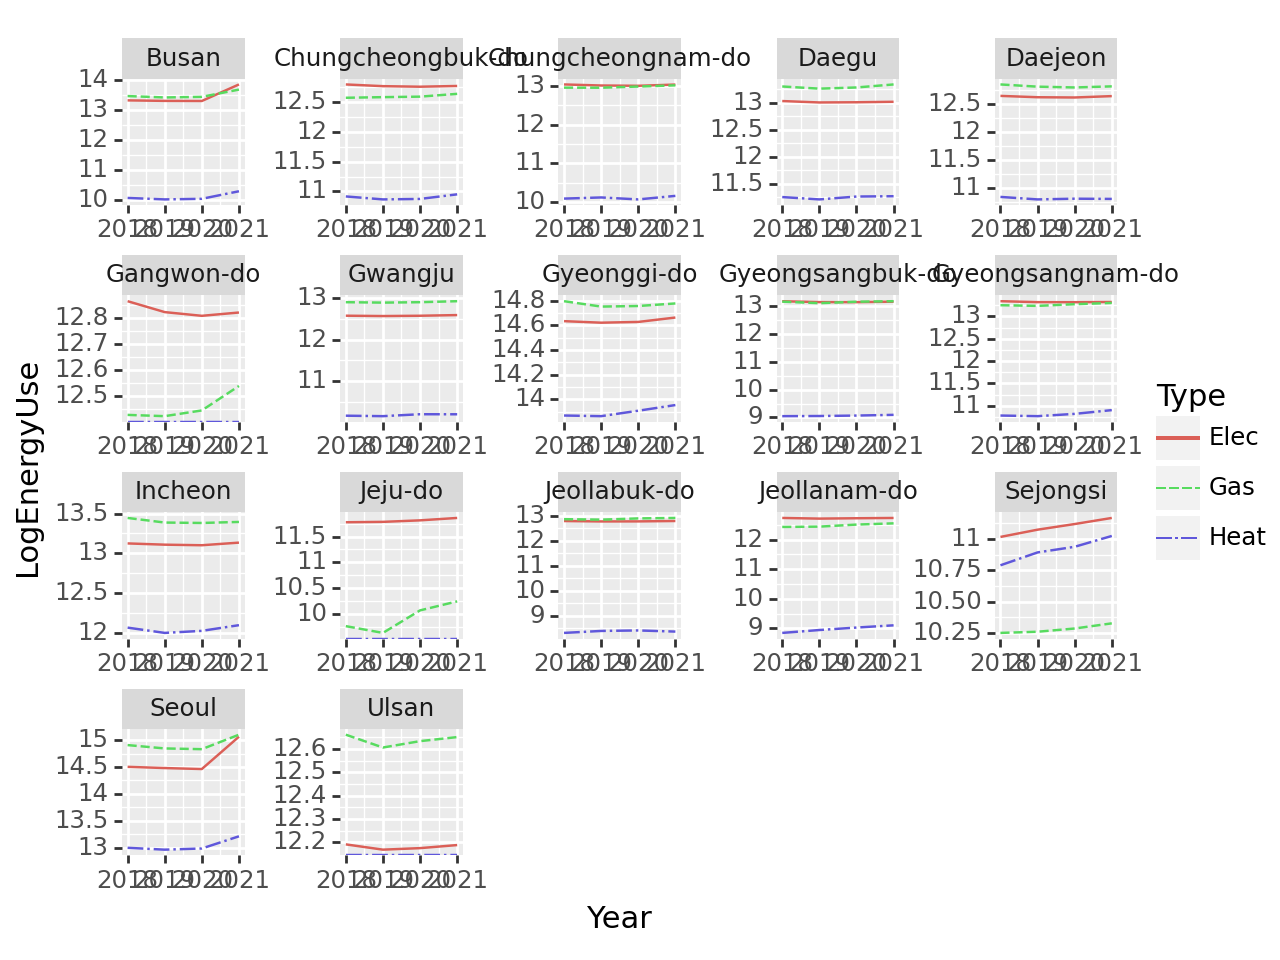

<Figure Size: (640 x 480)>

In [14]:
fig = ggplot(tidydata)
line = geom_line(aes(x = 'Year', y = 'LogEnergyUse', color = 'Type', linetype = 'Type'))

fig + line + facet_wrap('Prov', scales = 'free')  ## 해당 옵션은 그래프마다 스케일을 따로 적용시킨다.

> 뭔가 시각화는 되었는데, 마음에 들지 않는다.

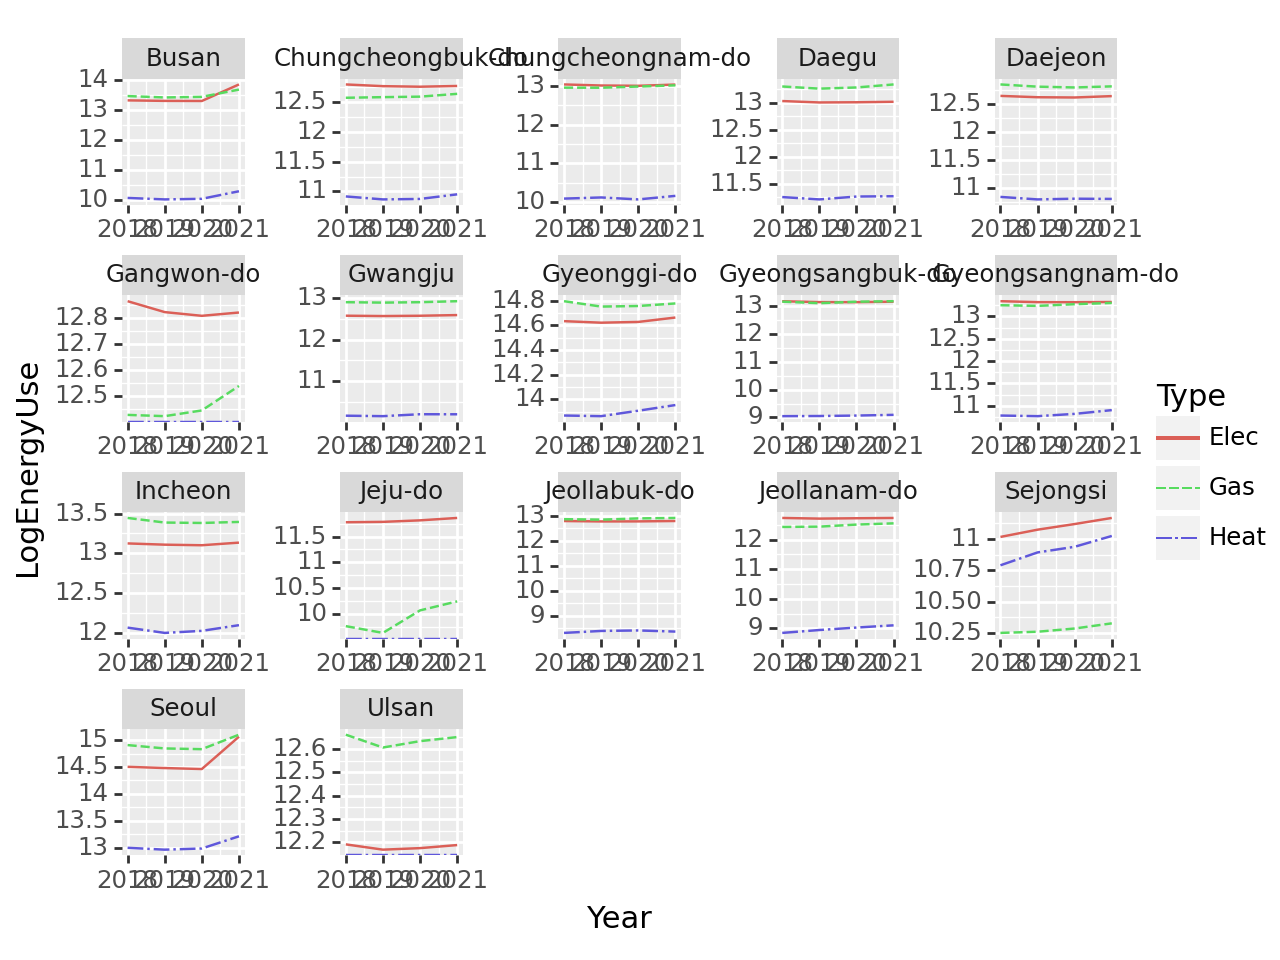

In [15]:
## matplotlib로 해당 개체를 이전
fig = (fig + line + facet_wrap('Prov', scales = 'free')).draw()
fig

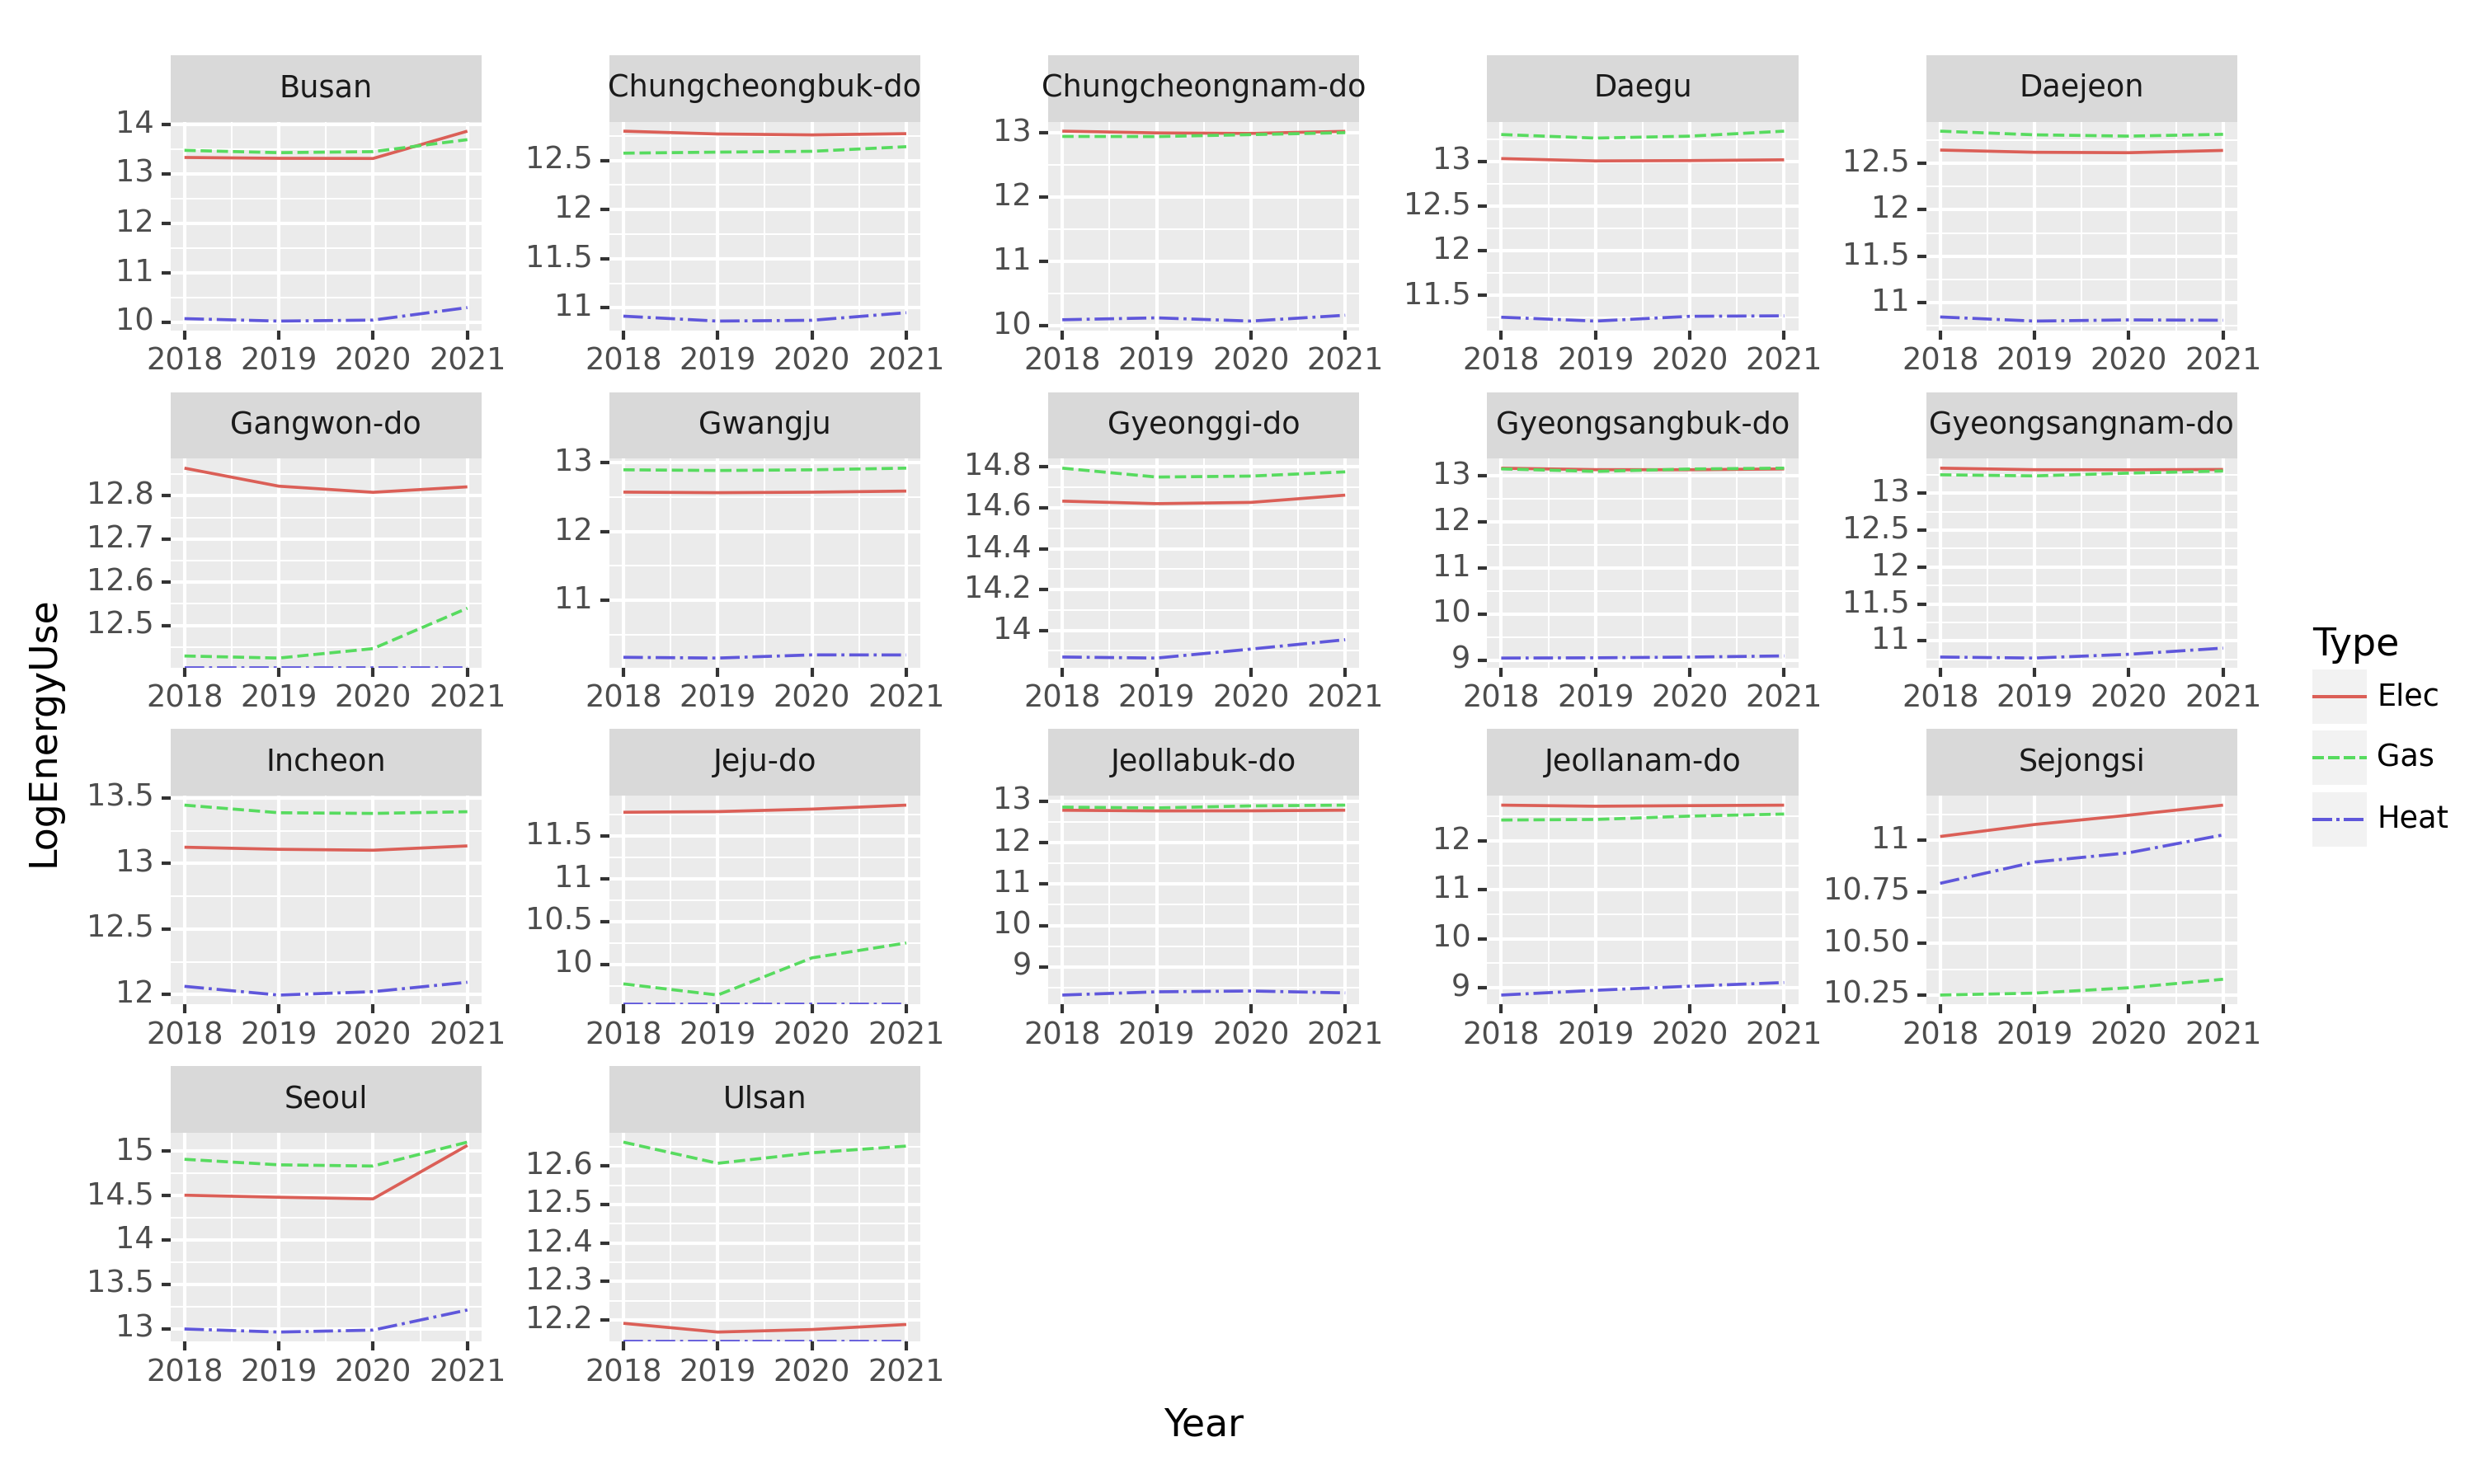

In [16]:
fig.set_size_inches(10, 6)
fig.set_dpi(150)
fig

> matplotlib에서의 메소드를 쉽게 적용시킬 수 있다.

5. Prov별로 총 에너지사용량이 많은 상위5개의 Reg을 찾고 아래와 같이 시각화 하라.
![](https://guebin.github.io/DV2023/posts/08wk-1_files/figure-html/cell-71-1-20b38260-b005-4d39-8ce1-2ee9a593ddb9.png)

In [17]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)

,Reg,Year,Prov,BldgCount,Area,Elec,Gas,Heat
0,종로구,2018,Seoul,17929,9141777,64818,82015,111
1,중구,2018,Seoul,10598,10056233,81672,75260,563
2,용산구,2018,Seoul,17201,10639652,52659,85220,12043
3,성동구,2018,Seoul,14180,11631770,60559,107416,0
4,광진구,2018,Seoul,21520,12054796,70609,130308,0
...,...,...,...,...,...,...,...,...
995,함양군,2021,Gyeongsangnam-do,12505,1509149,6328,3164,0
996,거창군,2021,Gyeongsangnam-do,14607,2322093,10404,8850,0
997,합천군,2021,Gyeongsangnam-do,16039,1612734,7587,0,0
998,제주시,2021,Jeju-do,67053,20275738,103217,25689,0


In [19]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Year', 'BldgCount', 'Area'], axis = 1)

,Reg,Prov,Elec,Gas,Heat
0,종로구,Seoul,64818,82015,111
1,중구,Seoul,81672,75260,563
2,용산구,Seoul,52659,85220,12043
3,성동구,Seoul,60559,107416,0
4,광진구,Seoul,70609,130308,0
...,...,...,...,...,...
995,함양군,Gyeongsangnam-do,6328,3164,0
996,거창군,Gyeongsangnam-do,10404,8850,0
997,합천군,Gyeongsangnam-do,7587,0,0
998,제주시,Jeju-do,103217,25689,0


> 필요없는 열을 없앤다.

In [23]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Year', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Prov', 'Reg']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)

,Prov,Reg,Type,EnergyUse
0,Seoul,종로구,Elec,64818
1,Seoul,종로구,Gas,82015
2,Seoul,종로구,Heat,111
3,Seoul,중구,Elec,81672
4,Seoul,중구,Gas,75260
...,...,...,...,...
2995,Jeju-do,제주시,Gas,25689
2996,Jeju-do,제주시,Heat,0
2997,Jeju-do,서귀포시,Elec,37884
2998,Jeju-do,서귀포시,Gas,2641


> 지역과 구, 타입과 에너지를 표기했다. 이름도 적절히 설정해줬다.

In [28]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Year', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Prov', 'Reg']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Prov', 'Reg'], values = 'EnergyUse', aggfunc = 'sum').reset_index()

,Prov,Reg,EnergyUse
0,Busan,강서구,200386
1,Busan,금정구,451212
2,Busan,기장군,287926
3,Busan,남구,491030
4,Busan,동구,156302
...,...,...,...
245,Ulsan,남구,607820
246,Ulsan,동구,281094
247,Ulsan,북구,334844
248,Ulsan,울주군,394217


> 구역별로 에너지 사용량을 합쳐버렸다.

In [37]:
g = df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Year', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Prov', 'Reg']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Prov', 'Reg'], values = 'EnergyUse', aggfunc = 'sum').reset_index()\
.groupby(by = 'Prov')

pd.concat([j.sort_values('EnergyUse', ascending = False).reset_index(drop = True).iloc[:5] for i, j in g], axis = 0)

,Prov,Reg,EnergyUse
0,Busan,부산진구,690344
1,Busan,해운대구,689901
2,Busan,사하구,522150
3,Busan,북구,493913
4,Busan,남구,491030
...,...,...,...
0,Ulsan,남구,607820
1,Ulsan,중구,395158
2,Ulsan,울주군,394217
3,Ulsan,북구,334844


> 구간마다 순위를 정해주기 위해 groupby 함수를 사용, sub-dataframe으로 쪼갠 후에 각각 sort_values() 해주었다.

In [40]:
pd.concat([j.sort_values('EnergyUse', ascending = False).reset_index(drop = True).iloc[:5] for i, j in g], axis = 0)\
.reset_index().rename({'index' : 'rank'}, axis = 1)

,rank,Prov,Reg,EnergyUse
0,0,Busan,부산진구,690344
1,1,Busan,해운대구,689901
2,2,Busan,사하구,522150
3,3,Busan,북구,493913
4,4,Busan,남구,491030
...,...,...,...,...
73,0,Ulsan,남구,607820
74,1,Ulsan,중구,395158
75,2,Ulsan,울주군,394217
76,3,Ulsan,북구,334844


> 인덱스는 랭크와 동일하므로 따로 남겨둔다.

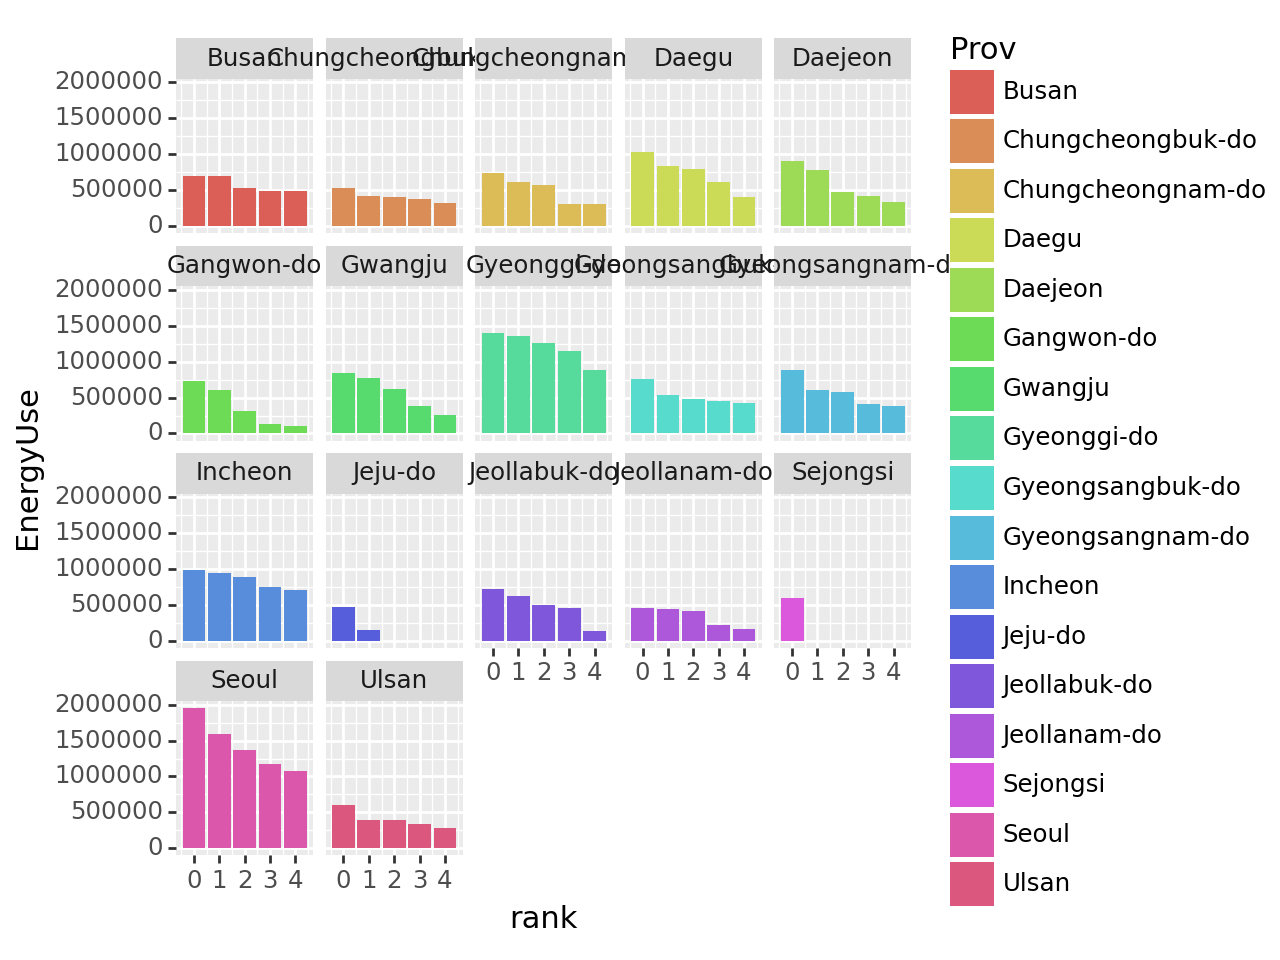

<Figure Size: (640 x 480)>

In [42]:
tidydata = pd.concat([j.sort_values('EnergyUse', ascending = False).reset_index(drop = True).iloc[:5] for i, j in g], axis = 0)\
.reset_index().rename({'index' : 'rank'}, axis = 1)

fig = ggplot(tidydata)
bar = geom_col(aes(x = 'rank', y = 'EnergyUse', fill = 'Prov'))

fig + bar + facet_wrap('Prov')

> 정보는 모두 포함하나, 짜임새가 없으므로 matplotlib로 이전

In [43]:
fig = (fig + bar + facet_wrap('Prov')).draw()

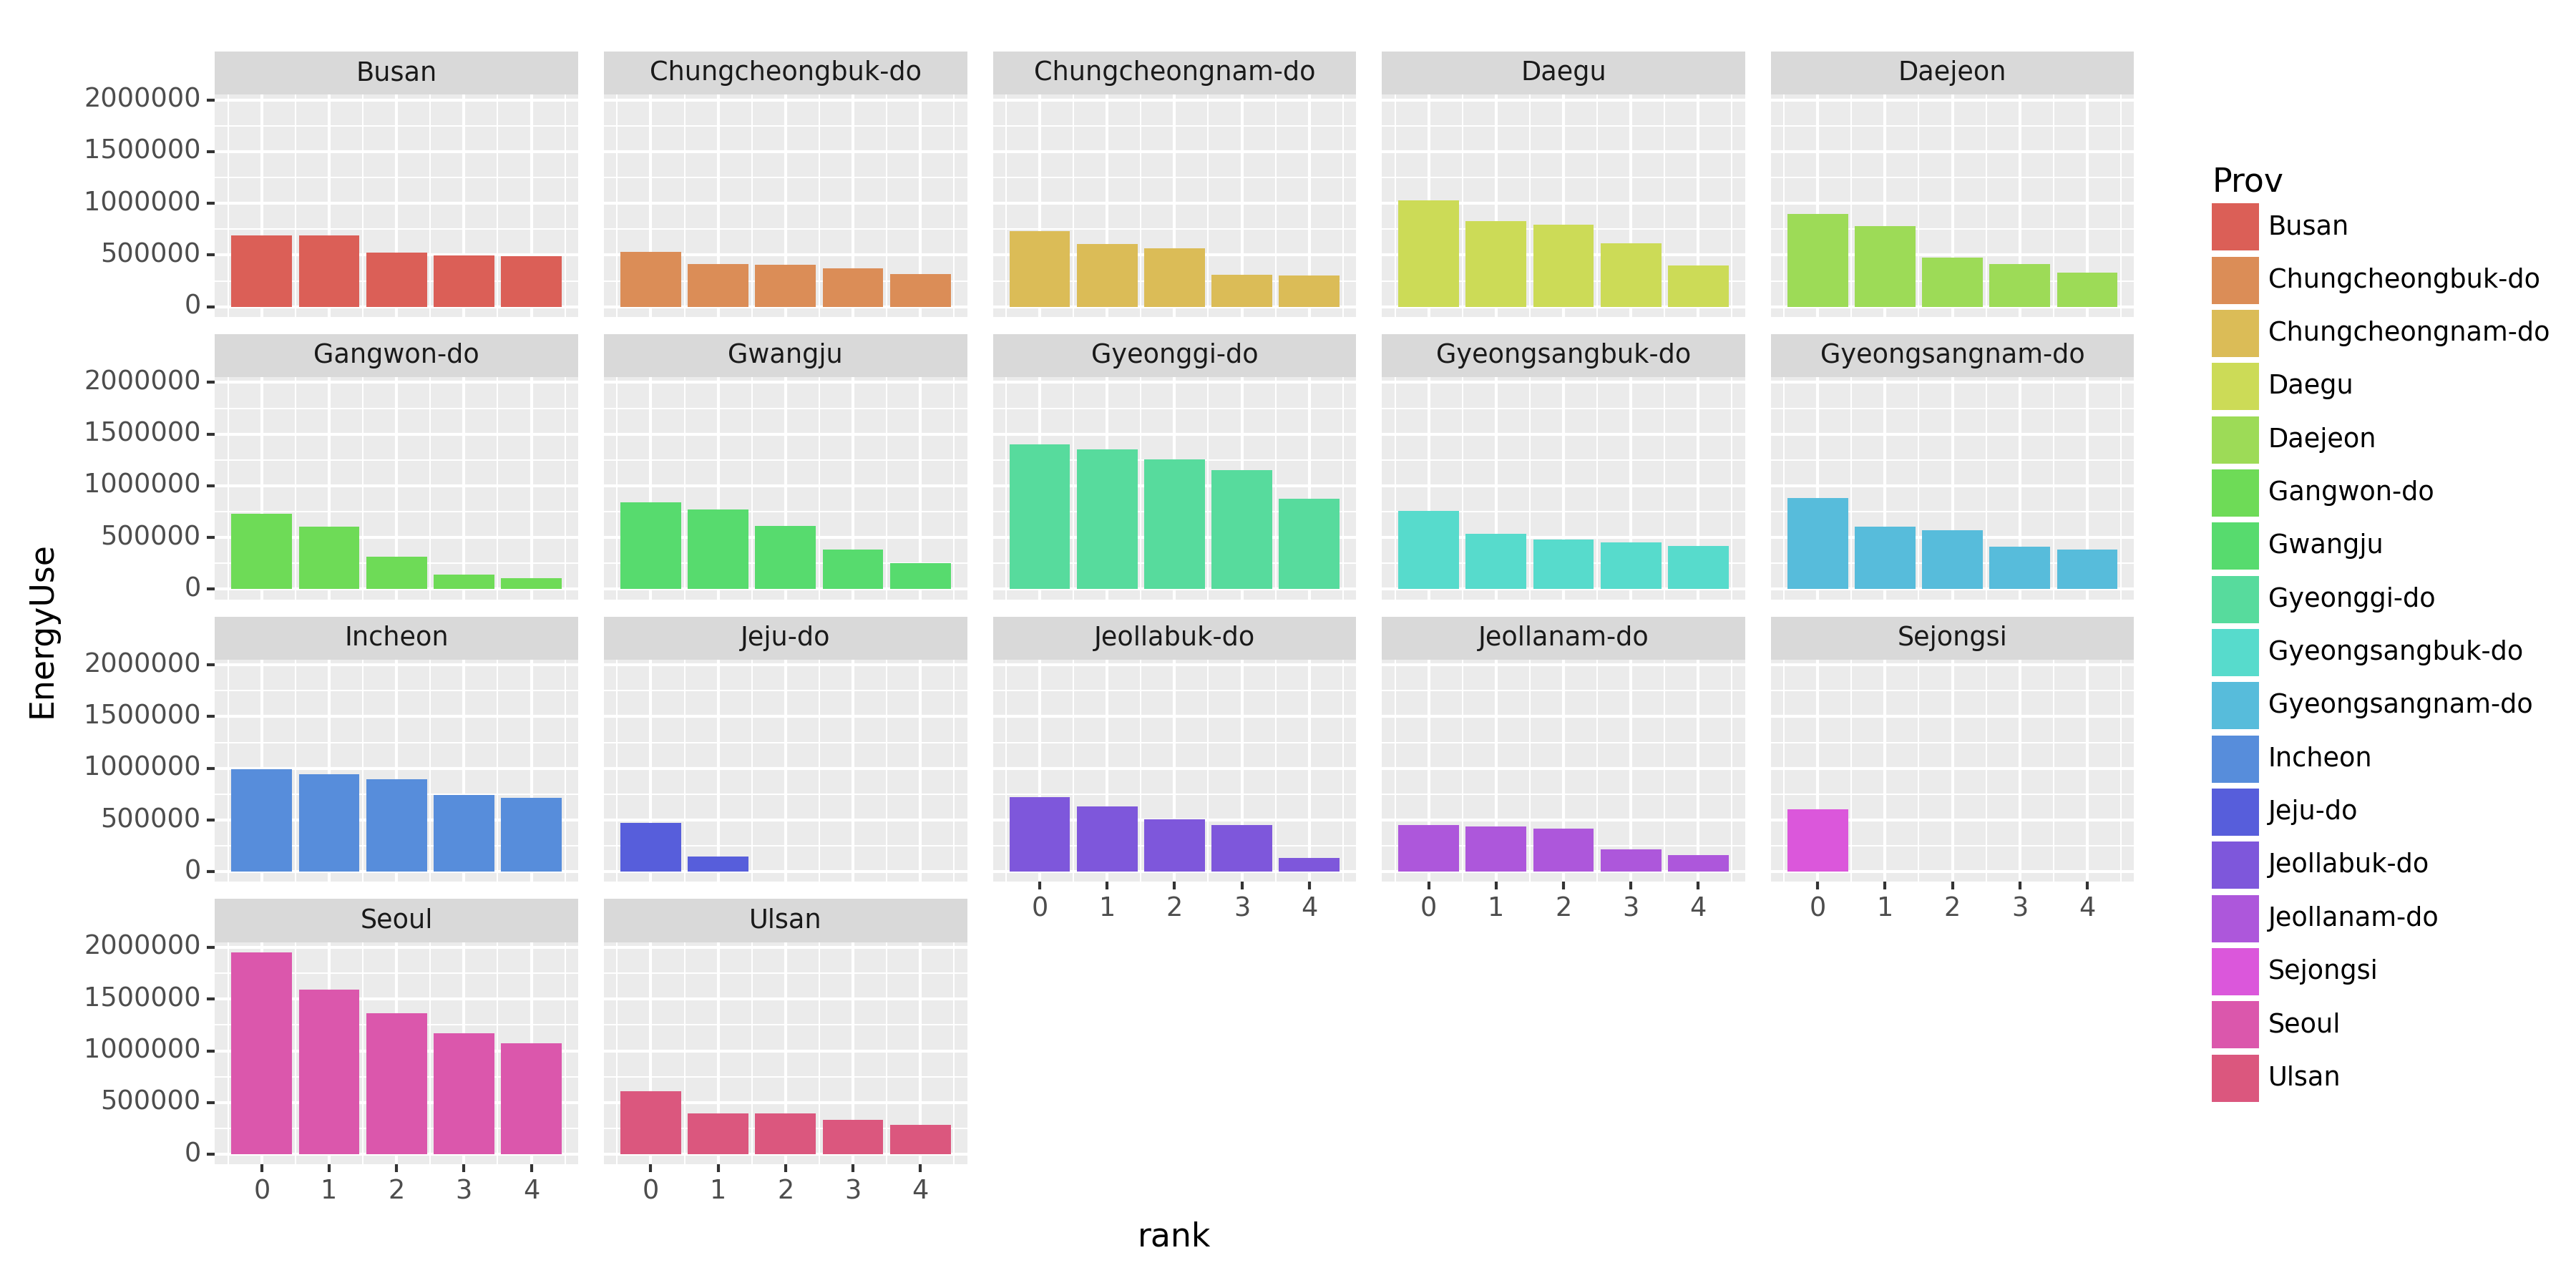

In [46]:
fig.set_size_inches(12, 6)
fig.set_dpi(150)
fig

> 완료

(5) (Prov,Year)별 전기에너지 사용량 비율을 구하고 아래와 같이 시각화 하라. + 제주를 제외한 지역으로 한정하고 시각화하라.

![](https://guebin.github.io/DV2023/posts/08wk-1_files/figure-html/cell-78-1-b4b7f41b-cd4f-46dd-9f7c-6455be63f23f.png)

In [47]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)

,Reg,Year,Prov,BldgCount,Area,Elec,Gas,Heat
0,종로구,2018,Seoul,17929,9141777,64818,82015,111
1,중구,2018,Seoul,10598,10056233,81672,75260,563
2,용산구,2018,Seoul,17201,10639652,52659,85220,12043
3,성동구,2018,Seoul,14180,11631770,60559,107416,0
4,광진구,2018,Seoul,21520,12054796,70609,130308,0
...,...,...,...,...,...,...,...,...
995,함양군,2021,Gyeongsangnam-do,12505,1509149,6328,3164,0
996,거창군,2021,Gyeongsangnam-do,14607,2322093,10404,8850,0
997,합천군,2021,Gyeongsangnam-do,16039,1612734,7587,0,0
998,제주시,2021,Jeju-do,67053,20275738,103217,25689,0


> 사용해야 할 것

x = 'Year', y = 'ElecRate', facet_wrap('Prov")

Elec, Gas, Heat

In [53]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Reg', 'BldgCount', 'Area'], axis = 1)

,Year,Prov,Elec,Gas,Heat
0,2018,Seoul,64818,82015,111
1,2018,Seoul,81672,75260,563
2,2018,Seoul,52659,85220,12043
3,2018,Seoul,60559,107416,0
4,2018,Seoul,70609,130308,0
...,...,...,...,...,...
995,2021,Gyeongsangnam-do,6328,3164,0
996,2021,Gyeongsangnam-do,10404,8850,0
997,2021,Gyeongsangnam-do,7587,0,0
998,2021,Jeju-do,103217,25689,0


> 필요없는 걸 없애고...

In [56]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Year', 'Prov']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)

,Year,Prov,Type,EnergyUse
0,2018,Seoul,Elec,64818
1,2018,Seoul,Gas,82015
2,2018,Seoul,Heat,111
3,2018,Seoul,Elec,81672
4,2018,Seoul,Gas,75260
...,...,...,...,...
2995,2021,Jeju-do,Gas,25689
2996,2021,Jeju-do,Heat,0
2997,2021,Jeju-do,Elec,37884
2998,2021,Jeju-do,Gas,2641


> long data로 변환했다.

In [57]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Year', 'Prov']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Year', 'Prov'], columns = 'Type', values = 'EnergyUse', aggfunc = 'sum')

Type                       Elec      Gas    Heat
Year Prov                                       
2018 Busan               613522   708240   23694
     Chungcheongbuk-do   361490   288927   55002
     Chungcheongnam-do   456260   420315   24286
     Daegu               457556   599115   77399
     Daejeon             309660   379571   51341
...                         ...      ...     ...
2021 Jeollabuk-do        357058   403399    4321
     Jeollanam-do        338032   281895    9012
     Sejongsi             70915    30533   61404
     Seoul              3486022  3617731  546491
     Ulsan               196412   312276       0

[68 rows x 3 columns]

> 지역(Prov)과 연도(Year)가 중복되는 값들을 각각 더해줘서 정리했다.

In [58]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Year', 'Prov']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Year', 'Prov'], columns = 'Type', values = 'EnergyUse', aggfunc = 'sum')\
.assign(EnergyUse = lambda _df : _df.Elec + _df.Gas + _df.Heat)

Type                       Elec      Gas    Heat  EnergyUse
Year Prov                                                  
2018 Busan               613522   708240   23694    1345456
     Chungcheongbuk-do   361490   288927   55002     705419
     Chungcheongnam-do   456260   420315   24286     900861
     Daegu               457556   599115   77399    1134070
     Daejeon             309660   379571   51341     740572
...                         ...      ...     ...        ...
2021 Jeollabuk-do        357058   403399    4321     764778
     Jeollanam-do        338032   281895    9012     628939
     Sejongsi             70915    30533   61404     162852
     Seoul              3486022  3617731  546491    7650244
     Ulsan               196412   312276       0     508688

[68 rows x 4 columns]

> 총 에너지 사용량 중 전기 에너지만을 구해야 하니 먼저 총 에너지를 구해준다.

In [60]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Year', 'Prov']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Year', 'Prov'], columns = 'Type', values = 'EnergyUse', aggfunc = 'sum')\
.assign(EnergyUse = lambda _df : _df.Elec + _df.Gas + _df.Heat)\
.drop(['Gas', 'Heat'], axis = 1).assign(ElecRate = lambda _df : _df.Elec / _df.EnergyUse)

Type                       Elec  EnergyUse  ElecRate
Year Prov                                           
2018 Busan               613522    1345456  0.455996
     Chungcheongbuk-do   361490     705419  0.512447
     Chungcheongnam-do   456260     900861  0.506471
     Daegu               457556    1134070  0.403464
     Daejeon             309660     740572  0.418136
...                         ...        ...       ...
2021 Jeollabuk-do        357058     764778  0.466878
     Jeollanam-do        338032     628939  0.537464
     Sejongsi             70915     162852  0.435457
     Seoul              3486022    7650244  0.455675
     Ulsan               196412     508688  0.386115

[68 rows x 3 columns]

> 필요없는 것을 없애고 비율을 넣어줬다. 이제 필요한 것은 비율 뿐이다.

In [62]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Year', 'Prov']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Year', 'Prov'], columns = 'Type', values = 'EnergyUse', aggfunc = 'sum')\
.assign(EnergyUse = lambda _df : _df.Elec + _df.Gas + _df.Heat)\
.drop(['Gas', 'Heat'], axis = 1).assign(ElecRate = lambda _df : _df.Elec / _df.EnergyUse)\
.drop(['Elec', 'EnergyUse'], axis = 1).reset_index()

Type,Year,Prov,ElecRate
0,2018,Busan,0.455996
1,2018,Chungcheongbuk-do,0.512447
2,2018,Chungcheongnam-do,0.506471
3,2018,Daegu,0.403464
4,2018,Daejeon,0.418136
...,...,...,...
63,2021,Jeollabuk-do,0.466878
64,2021,Jeollanam-do,0.537464
65,2021,Sejongsi,0.435457
66,2021,Seoul,0.455675


> 타이디데이터 같다.

In [63]:
tidydata = df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1)\
.drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.set_index(['Year', 'Prov']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Year', 'Prov'], columns = 'Type', values = 'EnergyUse', aggfunc = 'sum')\
.assign(EnergyUse = lambda _df : _df.Elec + _df.Gas + _df.Heat)\
.drop(['Gas', 'Heat'], axis = 1).assign(ElecRate = lambda _df : _df.Elec / _df.EnergyUse)\
.drop(['Elec', 'EnergyUse'], axis = 1).reset_index()

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\mizani\palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 16 rows containing missing values.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\mizani\palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\guides\guides.py:259: PlotnineWarning: geom_point legend : Removed 4 rows containing missing values.


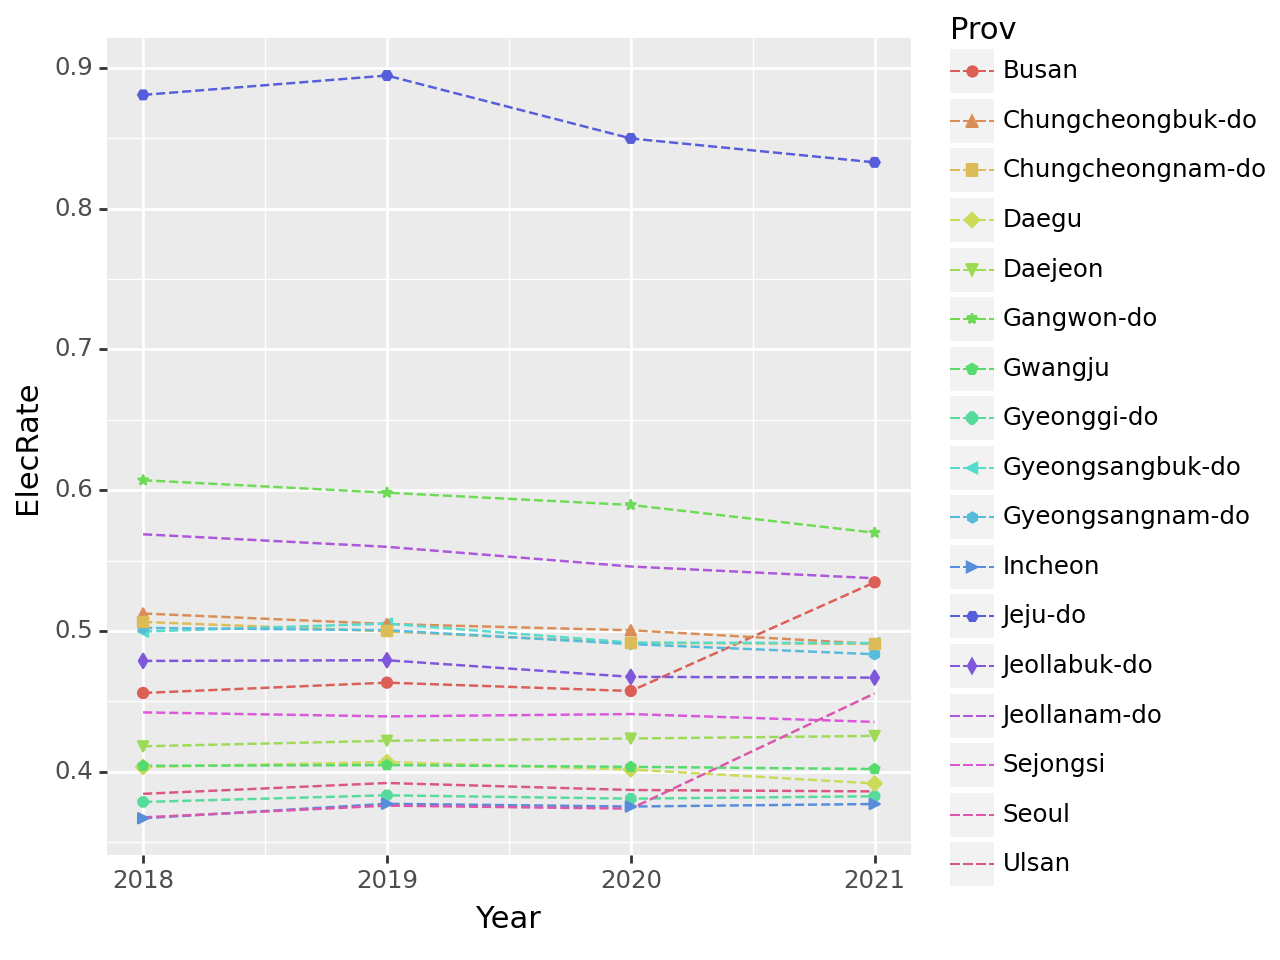

<Figure Size: (640 x 480)>

In [69]:
fig = ggplot(tidydata)
line = geom_line(aes(x = 'Year', y = 'ElecRate', color = 'Prov'), linetype = 'dashed')
point = geom_point(aes(x = 'Year', y = 'ElecRate', color = 'Prov', shape = 'Prov'))

fig + line + point

> 나름 괜찮지만 그래도 matplotlib에 데려와보자.

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\mizani\palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 16 rows containing missing values.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\mizani\palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\guides\guides.py:259: PlotnineWarning: geom_point legend : Removed 4 rows containing missing values.


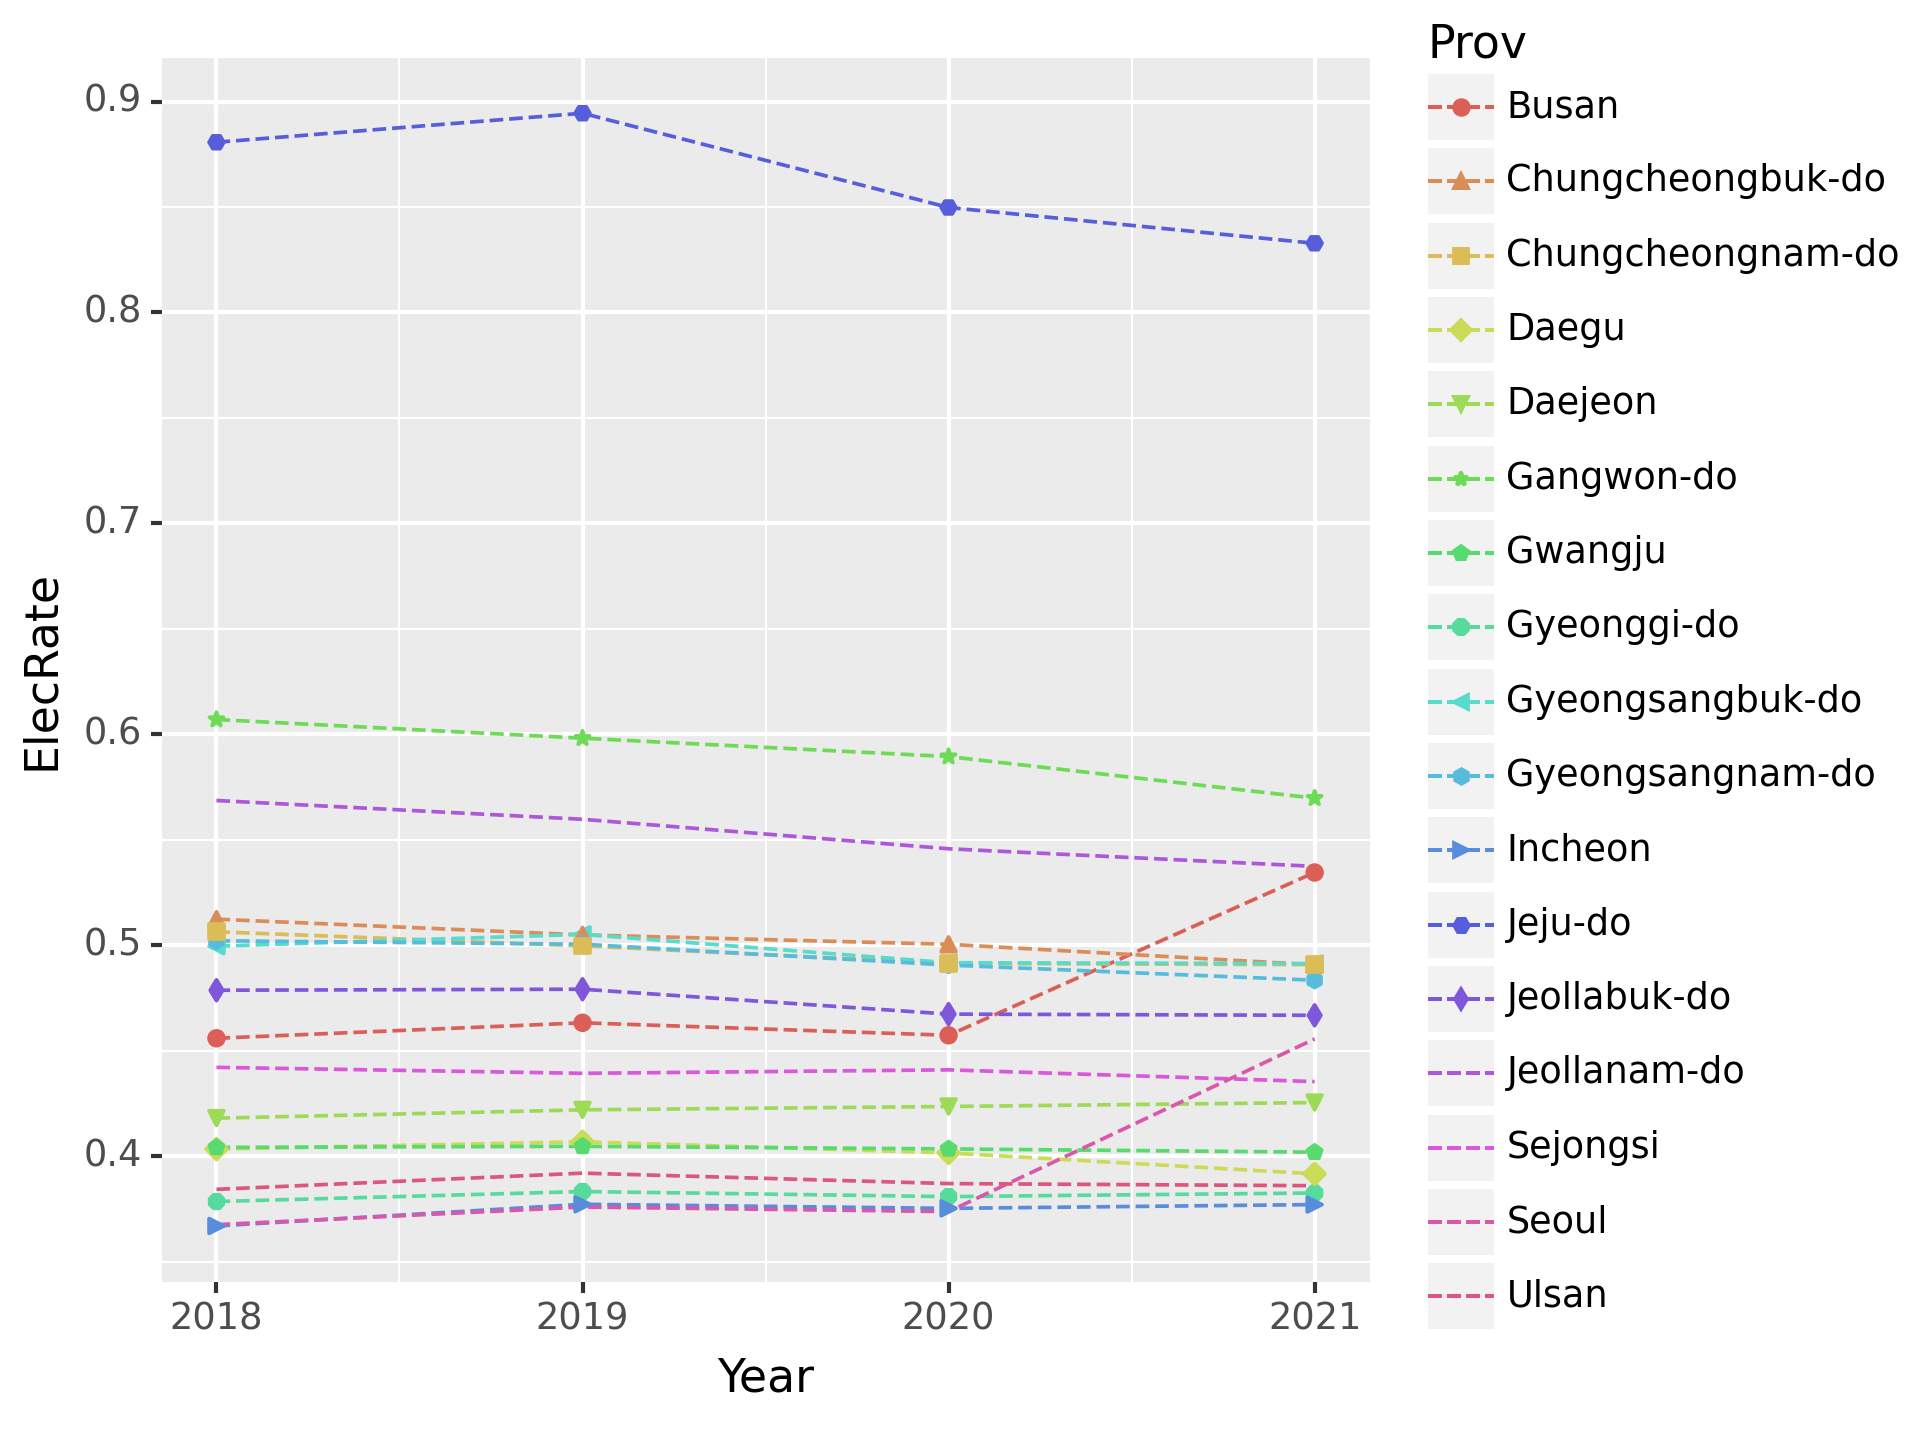

In [70]:
fig_ = (fig + line + point).draw()
fig_.set_dpi(150)
fig_

> ~와 나 너무 잘하는 거 아님?~

## 4. `pd.merge()`의 이용

> 그냥 뇌정지 올 것 같아도 일단 tidydata로 변환하고 시작하자!!

In [72]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1).drop(['BldgCount', 'Area'], axis = 1)

,Reg,Year,Prov,Elec,Gas,Heat
0,종로구,2018,Seoul,64818,82015,111
1,중구,2018,Seoul,81672,75260,563
2,용산구,2018,Seoul,52659,85220,12043
3,성동구,2018,Seoul,60559,107416,0
4,광진구,2018,Seoul,70609,130308,0
...,...,...,...,...,...,...
995,함양군,2021,Gyeongsangnam-do,6328,3164,0
996,거창군,2021,Gyeongsangnam-do,10404,8850,0
997,합천군,2021,Gyeongsangnam-do,7587,0,0
998,제주시,2021,Jeju-do,103217,25689,0


> 이런 데이터가 있으면... 일단 value 세 개인 Elec, Gas, Heat를 녹여야 함.

In [78]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1).drop(['BldgCount', 'Area'], axis = 1)\
.set_index(['Reg', 'Year', 'Prov']).stack().reset_index().rename({'level_3':'Type', 0:'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Prov', 'Year'], values = 'EnergyUse', aggfunc = 'sum').reset_index()

,Prov,Year,EnergyUse
0,Busan,2018,1345456
1,Busan,2019,1301422
2,Busan,2020,1314100
3,Busan,2021,1951909
4,Chungcheongbuk-do,2018,705419
...,...,...,...
63,Seoul,2021,7650244
64,Ulsan,2018,512512
65,Ulsan,2019,491191
66,Ulsan,2020,500742


> widedata로 만들었음. 일단 해!

In [83]:
df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1).drop(['BldgCount', 'Area'], axis = 1)\
.set_index(['Reg', 'Year', 'Prov']).stack().reset_index().rename({'level_3':'Type', 0:'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Prov', 'Year', 'Type'], values = 'EnergyUse', aggfunc = 'sum').reset_index()

,Prov,Year,Type,EnergyUse
0,Busan,2018,Elec,613522
1,Busan,2018,Gas,708240
2,Busan,2018,Heat,23694
3,Busan,2019,Elec,602980
4,Busan,2019,Gas,675882
...,...,...,...,...
199,Ulsan,2020,Gas,306896
200,Ulsan,2020,Heat,0
201,Ulsan,2021,Elec,196412
202,Ulsan,2021,Gas,312276


> 큰 데이터와 작은 데이터가 만들어졌다.

In [84]:
big = df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1).drop(['BldgCount', 'Area'], axis = 1)\
.set_index(['Reg', 'Year', 'Prov']).stack().reset_index().rename({'level_3':'Type', 0:'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Prov', 'Year', 'Type'], values = 'EnergyUse', aggfunc = 'sum').reset_index()

small = df.set_index(['지역', '년도', '시도']).applymap(lambda x : str(x).replace(',','')).astype(int).reset_index()\
.rename(name_dict, axis = 1).drop(['BldgCount', 'Area'], axis = 1)\
.set_index(['Reg', 'Year', 'Prov']).stack().reset_index().rename({'level_3':'Type', 0:'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Prov', 'Year'], values = 'EnergyUse', aggfunc = 'sum').reset_index()

In [93]:
pd.merge(big, small, on = ['Year', 'Prov']).loc[lambda _df : _df['Type'] == 'Elec'].reset_index(drop = True)\
.assign(ElecRate = lambda _df : _df.EnergyUse_x / _df.EnergyUse_y)\
.drop(['EnergyUse_x', 'EnergyUse_y'], axis = 1)

,Prov,Year,Type,ElecRate
0,Busan,2018,Elec,0.455996
1,Busan,2019,Elec,0.463324
2,Busan,2020,Elec,0.457401
3,Busan,2021,Elec,0.534566
4,Chungcheongbuk-do,2018,Elec,0.512447
...,...,...,...,...
63,Seoul,2021,Elec,0.455675
64,Ulsan,2018,Elec,0.384385
65,Ulsan,2019,Elec,0.392067
66,Ulsan,2020,Elec,0.387118


> 타이디데이터가 됐다.